# 图像基本操作
访问像素点/ROI/通道分离合并

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1546846870559_9YfdXhr5gP.jpg)

## 目标
* 访问和修改图像像素点的值
* 获取图像的宽高和通道数等属性
* 分离和合并图像通道

img[y,x]获取/设置像素点值，img.shape：图片的形状（行数、列数、通道数）,img.dtype：图像的数据类型。

img[y1:y2,x1:x2]进行ROI截取，cv2.split()/cv2.merge()通道分割/合并。更推荐的获取单通道方式：b = img[:, :, 0]。

## 正文

### 获取和修改像素点

* 获取图像

In [2]:
import cv2
img=cv2.imread('lena.jpg')
cv2.imshow('lena',img)
cv2.waitKey(0)

-1

* 通过行列坐标获取某像素点像素值，彩色图对应B,G,R三个值列表，灰度图只有一个值。行对应y，列对应x，所以其实是img[y, x]

In [4]:
px=img[100,90]
print('B,G,R',px)
px_blue=img[100,90,0]
print(px_blue)

B,G,R [ 83  94 198]
83


* 修改像素值

In [3]:
img[100,90]=[255,255,255]
print(img[100,90])

[255 255 255]


一种性能更好的方式,但是只能B,G,R逐一进行

获取像素值
```
img.item(100,100,0)
```
修改像素值
```
img.itemset((100,100,0),255)
```

### 图片属性

```img.shape```获取图片形状，彩色图返回（行，列，通道数）:

In [5]:
print(img.shape)

(350, 350, 3)


```img.dtype```获取图像数据类型

In [6]:
print(img.dtype)

uint8


```img.size```获取总像素数

In [7]:
print(img.size)

367500


In [9]:
350*350*3

367500

### ROI 感兴趣区域

* 截取图像很简单，指定图像的范围即可

In [21]:
face=img[140:265,150:250]
cv2.imshow('face',face)
cv2.waitKey(0)

-1

### 通道分割与合并

彩色图的BGR三个通道是可以分开单独访问的，也可以将单独的三个通道合并成一副图像。

分别使用```cv2.split()```和```cv2.merge()```：

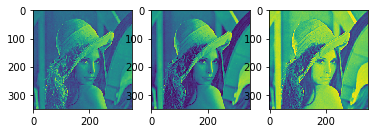

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
b,g,r=cv2.split(img)
plt.subplot(131)
plt.imshow(b)
plt.subplot(132)
plt.imshow(g)
plt.subplot(133)
plt.imshow(r)
plt.show()

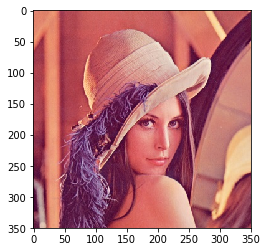

In [9]:
img=cv2.merge((r,g,b))
plt.imshow(img)
plt.show()
img=cv2.merge((b,g,r))

split很耗时，高效的方式：使用numpy中的索引。如提取B通道

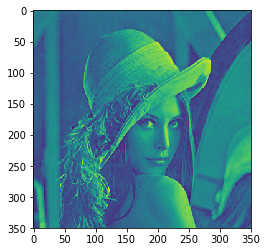

In [10]:
b=img[:,:,0]
plt.imshow(b)

## 练习

打开lena.jpg，将帽子部分（高：25~120，宽：50~220）的红色通道截取出来并显示。

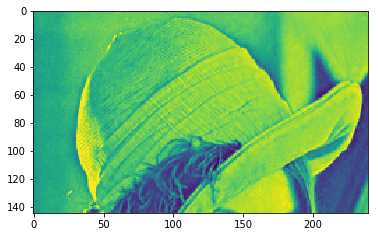

In [31]:
import cv2
img=cv2.imread('lena.jpg')
hat_red=img[25:170,50:290,2]
plt.imshow(hat_red)